In [1]:
import seaborn as sns
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/immobili.csv"
df=pd.read_csv(path, delimiter=',')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [3]:
df.rename(columns={"medv":"price"}, inplace=True)

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [5]:
df.head

<bound method NDFrame.head of         crim    zn  indus chas    nox     rm   age     dis  rad  tax ptratio  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2    4.09    1  296    15.3   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671    2  242    17.8   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671    2  242    17.8   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622    3  222    18.7   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622    3  222    18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...  ...     ...   
502  0.04527   0.0  11.93    0  0.573   6.12  76.7  2.2875    1  273    21.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675    1  273    21.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889    1  273    21.0   
505  0.04741   0.0  11.93    0  0.573   6.03  80.8   2.505    1  273    21.0   
506       is   not      a   ro     ck     et    sc      ie  nce    i      sn   

         

In [6]:
df = df.drop(labels=506, axis=0)

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
unique,504,26,76,2,81,446,356,412,9,66,46,357,455,229
top,0.01501,0.0,18.1,0,0.538,5.713,100.0,3.4952,24,666,20.2,396.9,7.79,50.0
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


In [8]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     506 non-null    object
 1   zn       506 non-null    object
 2   indus    506 non-null    object
 3   chas     506 non-null    object
 4   nox      506 non-null    object
 5   rm       506 non-null    object
 6   age      506 non-null    object
 7   dis      506 non-null    object
 8   rad      506 non-null    object
 9   tax      506 non-null    object
 10  ptratio  506 non-null    object
 11  b        506 non-null    object
 12  lstat    506 non-null    object
 13  price    506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [10]:
df = df.astype(float)

In [11]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [ ]:
sns.corr

In [ ]:
EDA

In [12]:
sns.set(color_codes=True)
%matplotlib inline

<Axes: >

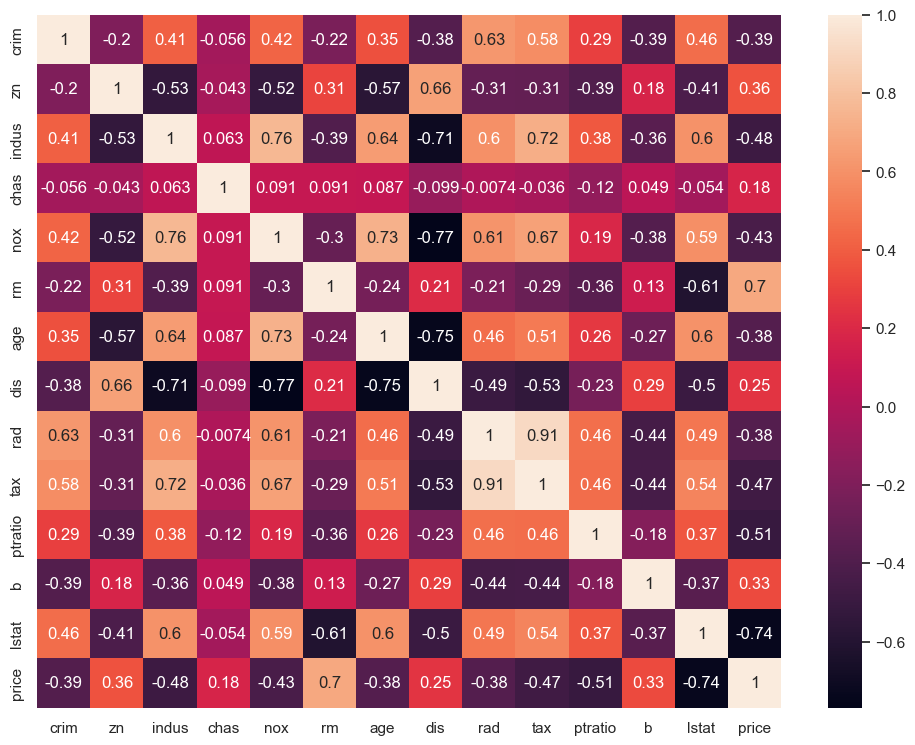

In [72]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True)

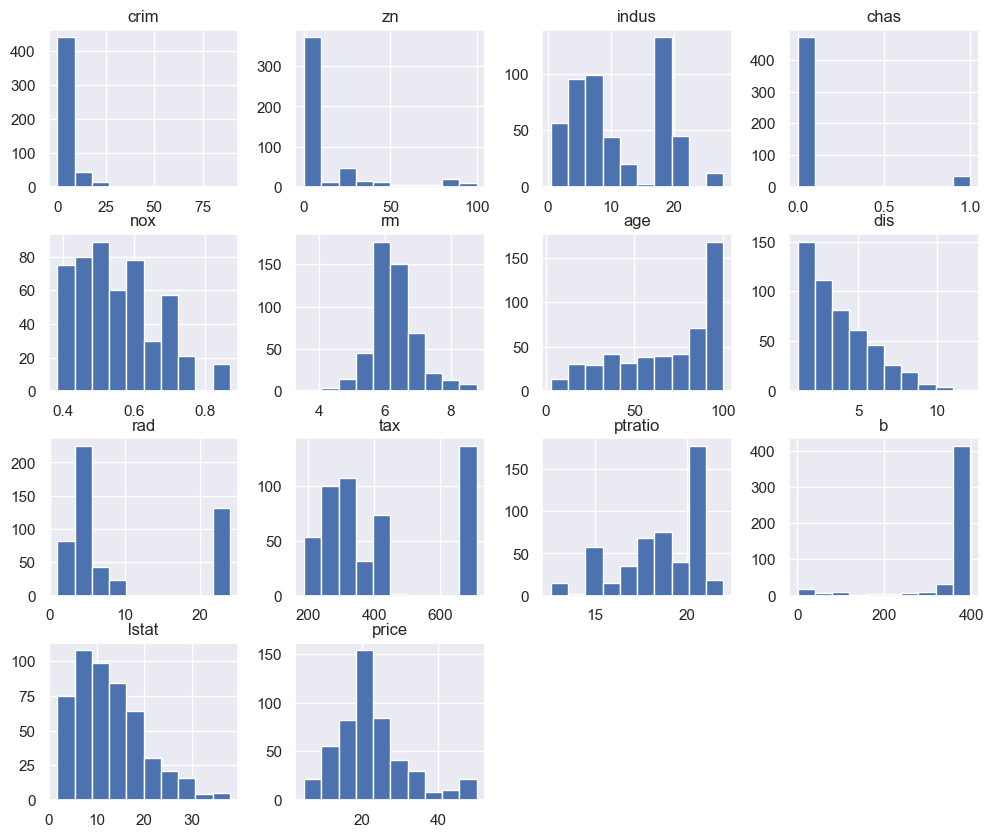

In [15]:
df.hist(figsize=(12,10));


In [73]:
sns.pairplot(df, hue="price")

TypeError: pairplot() got an unexpected keyword argument 'x'

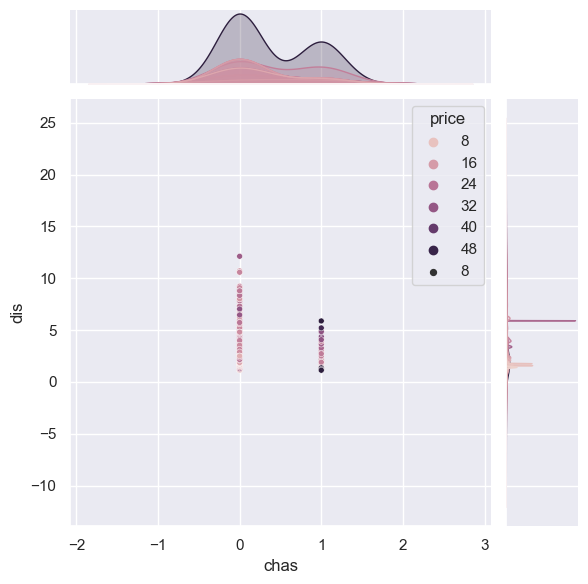

In [74]:
sns.jointplot(x="chas", y="dis", hue="price",data=df, size=8);

Fine eda

In [23]:
y=df['price']
X=df.drop(columns='price')
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=667)


In [58]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)


LinearRegression()

In [59]:
# Beta regressor
model.coef_

array([-9.62573031e-02,  5.36358855e-02,  1.92274224e-02,  2.11621572e+00,
       -1.38691006e+01,  3.67710727e+00, -7.11730538e-04, -1.48933517e+00,
        3.18447363e-01, -1.54217765e-02, -8.39888443e-01,  9.88534046e-03,
       -5.76109967e-01])

In [60]:
# Intercept
model.intercept_

34.62675024416096

In [61]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

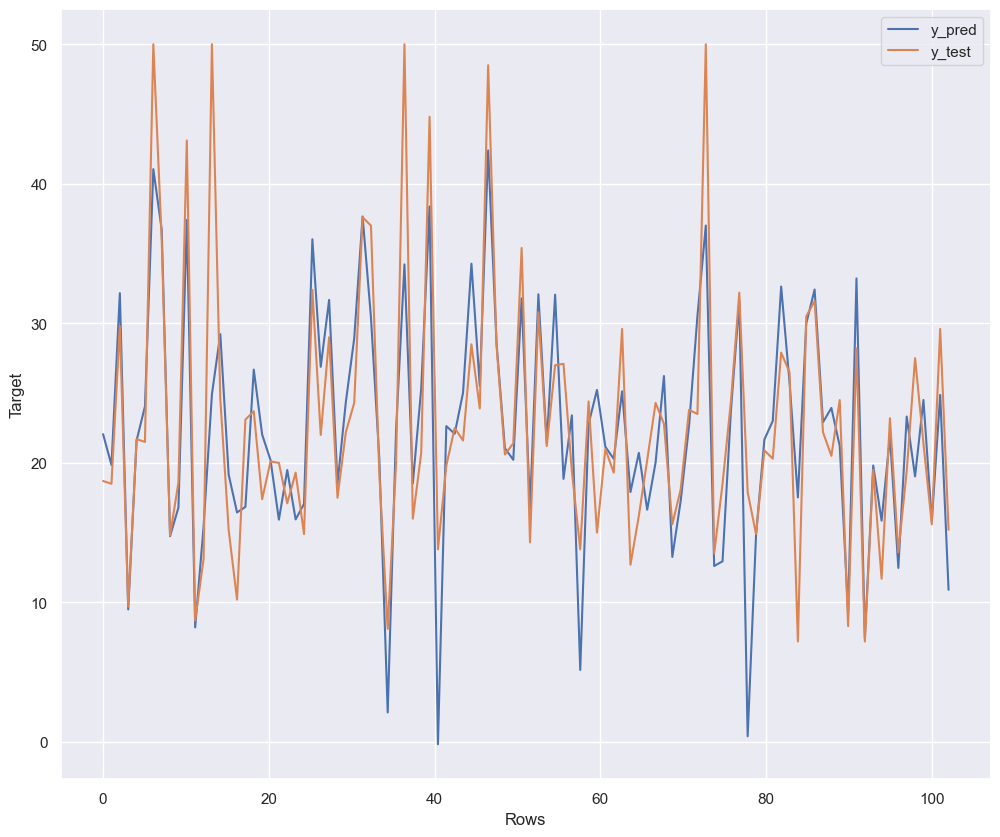

In [62]:
plt.figure(figsize = (12, 10))

l = y_pred.shape[0]
x = np.linspace(0,l,l)

plt.plot(x,y_pred)
plt.plot(x, y_test)
plt.title('')
plt.xlabel('Rows')
plt.ylabel('Target')
plt.legend(labels= ['y_pred', 'y_test'])

In [63]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,22.057837,18.7
1,19.843660,18.5
2,32.164167,29.8
3,9.499765,9.7
4,21.602101,21.7
...,...,...
97,19.030534,27.5
98,24.509224,21.4
99,15.822339,15.6
100,24.871602,29.6


In [64]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,22.057837,18.7,-3.357837
1,19.843660,18.5,-1.343660
2,32.164167,29.8,-2.364167
3,9.499765,9.7,0.200235
4,21.602101,21.7,0.097899
...,...,...,...
97,19.030534,27.5,8.469466
98,24.509224,21.4,-3.109224
99,15.822339,15.6,-0.222339
100,24.871602,29.6,4.728398


In [65]:
res_df['error'].mean()

0.4349570773755927

In [66]:

r2score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred, squared=False)

In [67]:
print('R2 score:',r2score)
print('MAE:' ,mae)
print('MSE:',mse)
print('RMSE:',rmse)

R2 score: 0.6649019242096056
MAE: 3.758973981895196
MSE: 29.975136130831306
RMSE: 5.474955354231787


In [68]:
import joblib

## to save a model
joblib.dump(model,'reg_test.pkl')

['reg_test.pkl']

In [69]:
## to load model
newmodel = joblib.load('reg_test.pkl')
newmodel

LinearRegression()

In [ ]:
X.to_csv("immobilidata.csv", index=False)